# **APL SURP Python course** - Notebook 2 (completed version)
### ***2-D arrays, tabular data, datetimes, and more***

*Created for the University of Washington Applied Physics Laboratory's Summer Undergraduate Research Program (SURP) 2025.*

For additional resources on Python basics, you can consult the following resources on the APL-SURP Python course website:
* Tutorials on Python fundamentals: https://uw-apl-surp.github.io/aplsurp-python/overview.html
* Complementary lessons on specific Python topics: https://uw-apl-surp.github.io/aplsurp-python/complementary_lessons.html

In [1]:
import numpy as np                         # NumPy is an array and math library
import matplotlib.pyplot as plt            # Matplotlib is a visualization (plotting) library
import pandas as pd                        # Pandas lets us work with spreadsheet (.csv) data
from datetime import datetime, timedelta   # Datetime helps us work with dates and times

## Warm-up: Debugging activity

The following code contains numerous mistakes — at least 10 unique ones. ***Can you fix them all so that the code runs and makes sense?***

To keep track of your fixes, add a comment (`#`) at the end of lines you've changed and note what you modified.

In [ ]:
# Here are the Beatles' names
1st_beatle = 'John'
2nd_beatle = 'Paul
3rd_beatle = 'George"
4th_beatle = 'Ringo'

# Here are the Beatles' ages, in order of their names
ages = ['23','21','20','23']

# This is the age range of the Beatles (= oldest age minus youngest age)
age range = age[1] - age[3]

# Here are some print statements
print('The Beatles were (ages[1]), (ages[2]), (ages[3]), 'and' (ages[4]) when they arrived in America.')
print('The youngest Beatle's name was' + 3rd_beatle + '.')

In [13]:
# Copy the code from above and fix it below:

# Here are the Beatles' names
beatle1 = 'John'   # changed variable names to not begin with numbers
beatle2 = 'Paul'   # added missing closing quote mark
beatle3 = 'George' # changed closing double quote mark to single quotes to match
beatle4 = 'Ringo'

# Here are the Beatles' ages, in order of their names
ages = [23,21,20,23]     # changed from strings to integers to allow mathematical operations

# This is the age range of the Beatles (= oldest age minus youngest age)
age_range = ages[0] - ages[2]   # fixed variable name typo (ages, not age)
                                # added underscore in variable name (age_range)
                                # changed indexing to start at 0, not 1

# Here are some print statements
print(f'The Beatles were {ages[0]}, {ages[1]}, {ages[2]}, and {ages[3]} when they arrived in America.')
   # changed indexing to start at 0, not 1
   # added 'f' to start of formatted string
   # changed parentheses around variables to curly brackets
   # removed interior quotation marks

print("The youngest Beatle's name was " + beatle3 + '.')   # updated variable name; added space
                                                           # option 1: changed to double quotes
print('The youngest Beatle\'s name was ' + beatle3 + '.')  # option 2: "escaped" the quote mark using back slash

The Beatles were 23, 21, 20, and 23 when they arrived in America.
The youngest Beatle's name was George.
The youngest Beatle's name was George.


## Part 1: 2-D arrays

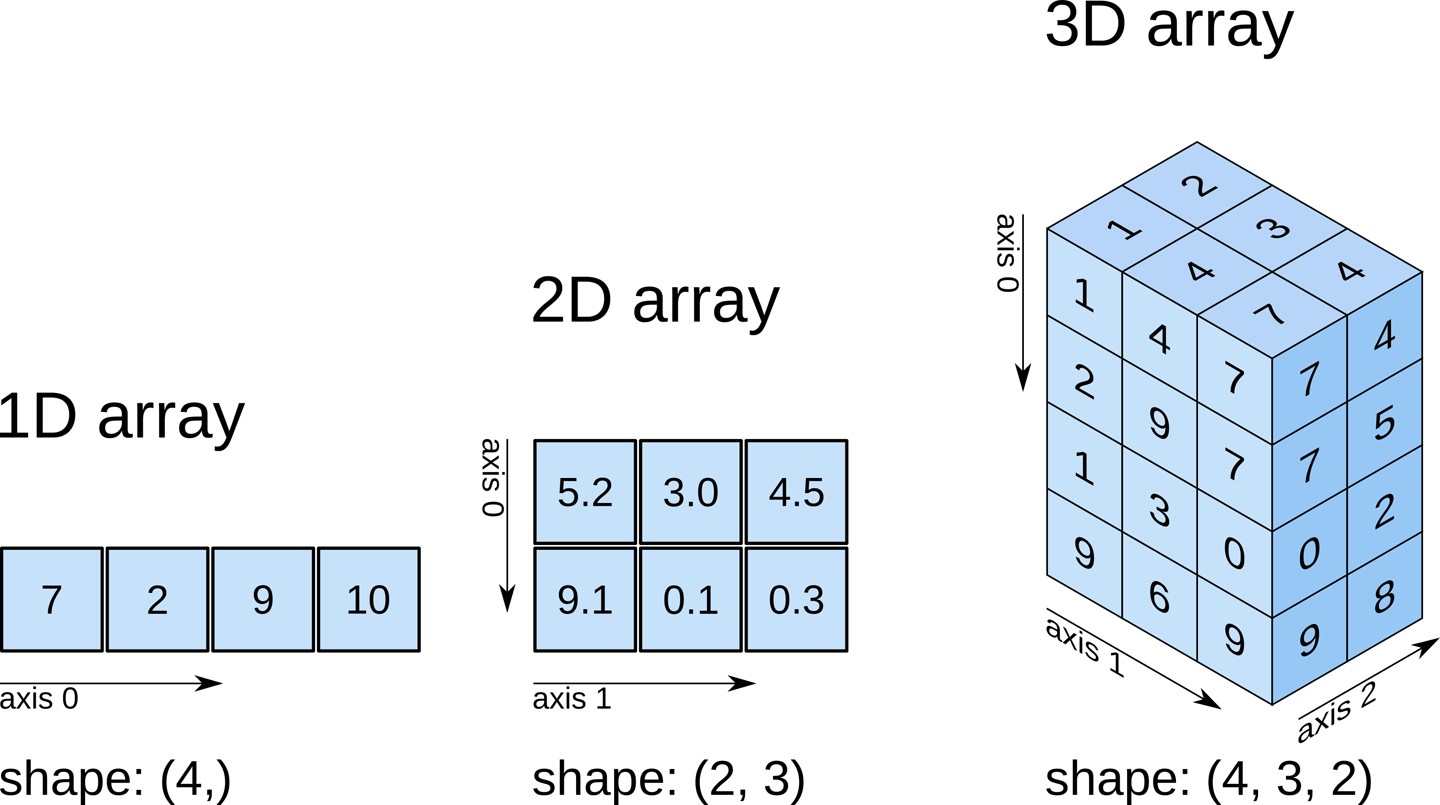

*Image source: [digitalearthafrica.org](https://training.digitalearthafrica.org/en/latest/python_basics/02_numpy.html)*

NumPy arrays can also be **two-dimensional** (or higher dimensions). Whoa!

This allows us to represent data on multiple **axes**. Arrays can also be 3-D, 4-D, or higher-dimensional!

2-D arrays can be defined using nested brackets: **[ [ ], [ ], [ ], etc. ]**. Below, I've created a 2-D NumPy array where each column represents the average monthly temperatures for a city. Each row is a different city. I found the data for [New York, NY](https://en.climate-data.org/north-america/united-states-of-america/new-york/new-york-1091/#climate-table) (top row - index 0) and [Seattle, WA](https://en.climate-data.org/north-america/united-states-of-america/washington/seattle-593/#climate-table) (bottom row - index 1) on [climate-data.org](https://en.climate-data.org/).

In [3]:
temp = np.array([[30.3,32.0,39.4,50.8,60.9,70.3,76.0,74.5,68.1,56.6,45.8,36.5],   # (New York; temperatures in °F)
                 [40.0,40.6,44.2,48.4,54.9,60.2,66.2,66.7,60.5,52.0,44.5,39.6]])  # (Seattle)

print(temp)

[[30.3 32.  39.4 50.8 60.9 70.3 76.  74.5 68.1 56.6 45.8 36.5]
 [40.  40.6 44.2 48.4 54.9 60.2 66.2 66.7 60.5 52.  44.5 39.6]]


Just like `len()` gives the length of a 1-D array, the command **`.shape`** (a property, not a function!) gives the dimensions of a 2-D (or 3-D, 4-D, etc.) array:

In [ ]:
temp.shape    # returns: (number of rows, number of columns)

(2, 12)

**Axis 0** goes across rows and **axis 1** goes down columns.

We still index and slice into 2-D arrays using brackets, but now we need to use a comma (`,`) to separate the indices for each dimension:

> **`array_name[ROW_INDEX, COLUMN_INDEX]`**

So if we want to get the temperature in New York (row index 0) in June (month #6 = Python column index 5), we would write:

In [ ]:
print(temp[0,5])

70.3


***Use indexing to retrieve the December average temperature in Seattle. Print your result:***

In [ ]:
# Write your code below
print(temp[1,11])

39.6


Slicing works the same way. Instead of a single row or column index, use a range of indices:

> **`array_name[ROW_START:ROW_END, COLUMN_START:COLUMN_END]`**

To get all the elements along a certain axis, just use a single colon, `:`.

***Try using slicing to get the temperatures for the first half of the year for New York:***

In [ ]:
# Write your code below
temp[0,0:6]

array([30.3, 32. , 39.4, 50.8, 60.9, 70.3])

***Next, try using slicing to obtain the average temperatures for both cities in August. Which city is warmer?***

In [ ]:
# Write your code below
temp[:,7]

array([74.5, 66.7])

***Finally, using slicing and mathematical operations to calculate the average temperature for Seattle between June to August (three months). You got this!***

In [4]:
# Write your code below
average_temp = (temp[1,5] + temp[1,6] + temp[1,7]) / 3
print(average_temp)

64.36666666666667


## Part 2: Using functions

You've already learned at least three functions: `print()`, `np.array()`, and `len()`. Functions usually take one or more input **arguments** inside the parentheses, with multiple arguments separated by commas. Then the function can output, or "**return**", something back.

Sometimes a function will do something without returning anything. For example, `print()` doesn't return anything — it just prints the input to the screen.

Let's learn a few other functions...

The NumPy function **`np.arange(START, END, INTERVAL)`** creates an array of numbers from START to END with a certain INTERVAL between each number.

***Can you guess what the result of the code below will be before running it?***

In [ ]:
np.arange(0,40,5)

array([ 0,  5, 10, 15, 20, 25, 30, 35])

Note that **`np.arange(END)`** is a shorter way of writing **`np.arange(0,END,1)`**:

In [ ]:
print(np.arange(10))
print(np.arange(0,10,1))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Additionally, the NumPy package has many useful functions for mathematical operations. You can find them on the NumPy website: https://numpy.org/doc/stable/reference/routines.html. Here are a few of them:

* **`np.mean(INPUT)`** calculates the average value of the elements in an `INPUT` list or NumPy
array
* **`np.sum(INPUT)`** calculates the sum of the elements in an `INPUT` list or array
* **`np.max(INPUT)`** and **`np.min(INPUT)`** find the maximum or minimum values in `INPUT`
* **`np.ones(N)`** creates a new array of length `N` filled with the integer `1`
* **`np.zeros(N)`** creates a new array of length `N` filled with the integer `0`

For example:

In [ ]:
# We can do some math on the following array:
test = np.array([1,2,3])
print(np.mean(test))
print(np.sum(test))
print(np.max(test))

# Create new arrays:
print(np.ones(5))
print(np.zeros(5))

2.0
6
3
[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


Many functions can be **called** (applied) to a variable in two different ways. For example:

In [ ]:
print(np.mean(test))    # Option 1

2.0


In [ ]:
print(test.mean())      # Option 2 (same result!)

2.0


To learn more about a function, you can always consult its online **documentation**! A package's documentation website usually has a page for each function describing its arguments, outputs, and examples of how to use it. [Here](https://numpy.org/doc/2.3/) is NumPy's documentation page, including a user guide.

***Google "numpy mean" to find the documentation page for that function. How is the webpage structured, and what information does it tell us about the arguments needed to apply `np.mean()` to 2-D arrays?***

Now that you've discovered named arguments... ***use `np.mean()` to calculate and print the average annual (yearly) temperatures in New York and Seattle using the variable `temp` from earlier:***

In [5]:
# Write your code here:
np.mean(temp,axis=1)

array([53.43333333, 51.48333333])

As a shortcut, you can access a function's documentation within Google Colab by typing a `?` mark followed by the function name without parentheses. ***Try it!***

In [ ]:
?np.mean

Google is a powerful way to discover functions that accomplish a task you need to do. Can you try the following?
1. ***Using Google, find a function that calculates the standard deviation of a NumPy array.***
2. ***Now, use that function to calculate and print the standard deviation of Seattle's monthly temperatures below.***

In [6]:
# Write your code here:
print(f'The standard deviation is {np.std(temp[1,:])}°F')

# Note that we can format the number to two decimal places by adding ":.2f" after the function
print(f'The standard deviation is {np.std(temp[1,:]):.2f}°F')

The standard deviation is 9.661765999144372°F
The standard deviation is 9.66°F


## Part 3: Missing data

In the real world, you'll frequently encounter missing data in an array.

Missing data is represented by the float **`np.nan`** or **`np.NaN`** (the two are the same). NaN stands for "Not a Number".

Note that NaN values are different than `None`, which is a specific object in Python that can be used as a placeholder value.

In [14]:
pH_measurements = np.array([7.84, 7.91, 8.05, np.nan, 7.96, 8.03])

print(pH_measurements)

[7.84 7.91 8.05  nan 7.96 8.03]


We can test for missing values using the function **`np.isnan()`**, which returns a boolean (or a boolean array when applied to an array):

In [16]:
print(np.isnan(5))

False


In [17]:
print(np.isnan(np.nan))

True


In [18]:
print(np.isnan(pH_measurements))

[False False False  True False False]


It's good to be aware that missing data can cause functions like `np.mean()` to fail:

In [22]:
print(np.mean(pH_measurements))

nan


Many functions have a "NaN-safe" version that ignores missing values and still calculates the result, such as **`np.nanmean()`**:

In [23]:
print(np.nanmean(pH_measurements))

7.958


## Part 4: Loading tabular data

Up until now, we've been using data that we've typed directly into Python. However, most real-world data is stored in files that we'd like to open using Python.

The most common type of data file is a **spreadsheet**, which has rows and columns. Generally, the columns will have column labels. This type of 1-D or 2-D data is also called **tabular data** because you can store it in a table.

Sometimes there is only one column of data, such as a **time series** of, say, date vs. sea surface temperature.

Tabular data is often stored in **comma-separated value (CSV)** format, with the file extension being `.csv`. Data files in this format can be opened using Microsoft Excel or Google Sheets, as well as Python. Other times it is stored in Microsoft Excel's `.xlsx` format.

In Python, we use the `pandas` package to work with tabular data. Remember that we imported the package earlier using:

> `import pandas as pd`

Just like NumPy has the `array` object, Pandas has two types of objects: `Series` and `DataFrame`. This is what they look like:
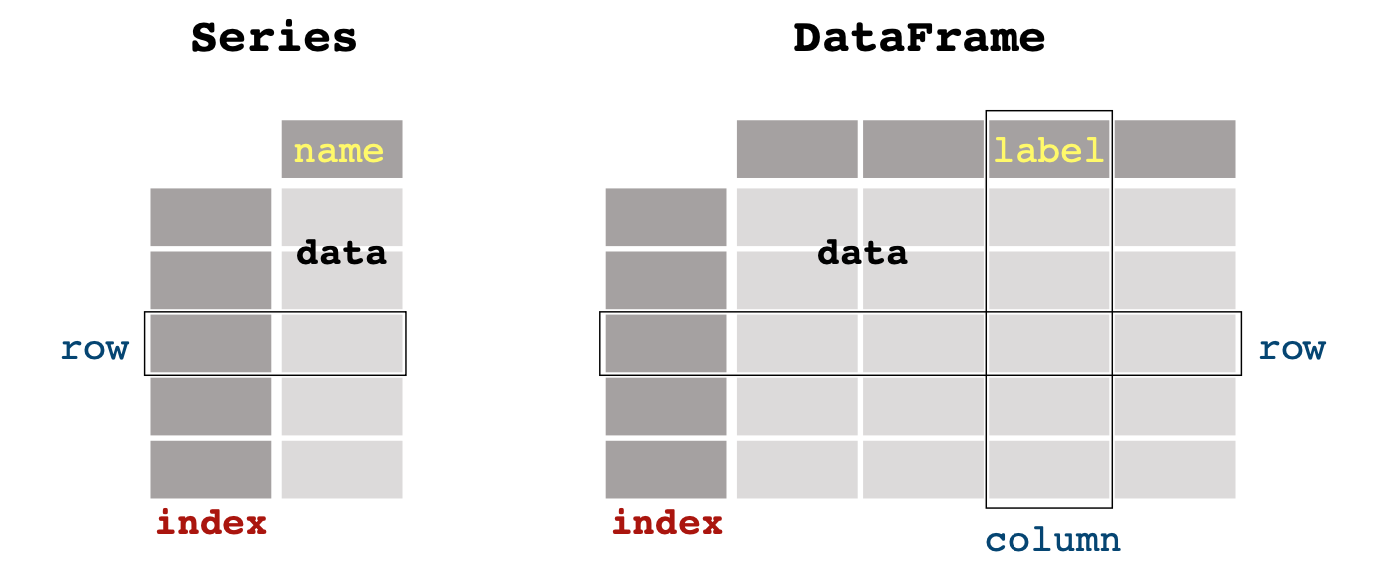

For now, we'll just be applying simple operations to read spreadsheet data using `pandas`. But if you would like to learn more, check out these [lesson slides](https://ethan-campbell.github.io/OCEAN_215/materials/lessons/lesson_9.pdf) or these lesson videos ([Part 1](https://www.youtube.com/watch?v=ev_qX-czUKs), [Part 2](https://www.youtube.com/watch?v=56ZRM7u06nM)). You can find the `pandas` user guide [here](https://pandas.pydata.org/).

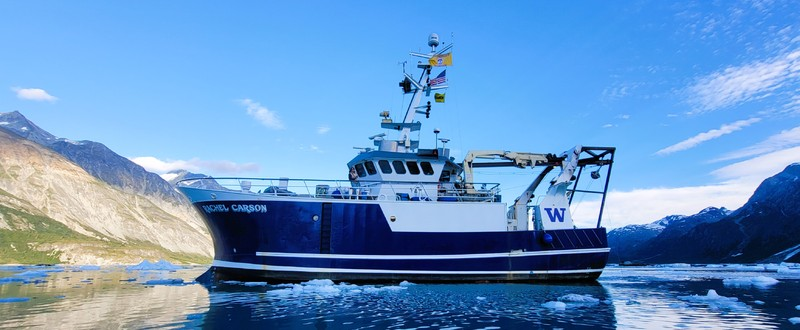

*Image source: [UW](https://www.ocean.washington.edu/story/RV_Rachel_Carson)*

First, let's download two `.csv` data files from Google Drive here: https://drive.google.com/drive/folders/1Am6XdlB-APQ3ccOvLeGK8DFPQ2OnPeJD?usp=share_link. Each file is a conductivity-temperature-depth (CTD) cast that was collected from the ship R/V *Rachel Carson* off of Carkeek Park near Seattle. ***Save these two files to your computer.***

Next, we can upload the files to this Google Colab notebook. ***Click the sidebar folder icon on the left, then use the page-with-arrow icon at the top to select the files and upload them.*** Note that uploaded files will be deleted from Google Colab when you refresh this notebook!

We will specify each **filepath** using string variables:

In [8]:
filepath_0 = '/content/2023051001001_Carkeek.csv'
filepath_1 = '/content/2023051101001_Carkeek.csv'

Now, we can load the files using `pandas`:

> **`pd.read_csv(FILEPATH, ARGUMENTS...)`**

This function is very customizable using the many optional `ARGUMENTS`, which allow it to handle almost any file. You can find documentation about the `pd.read_csv()` arguments [at this link](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

***Let's first take a look at the data file using a simple text editor. Notice the long header. What argument can we use to exclude the header from being loaded?***

Below, we'll load each data file using ``pd.read_csv()`` and store each file into a new variable.

We can look at the data using **`display()`** (which is a fancy version of `print()` for `DataFrame` objects):

In [9]:
data_0 = pd.read_csv(filepath_0,comment='#')
data_1 = pd.read_csv(filepath_1,comment='#')

display(data_0)

,Unnamed: 0,index,altM,CStarTr0,c0mS/cm,density00,depSM,latitude,longitude,flECO-AFL,...,sbeox0Mg/L,sbeox0ML/L,ph,potemp090C,prDM,sal00,t090C,scan,nbf,flag
0,0,3407,98.53,71.0825,31.662958,1021.7317,2.101,47.71418,-122.40854,2.8127,...,10.6450,7.4488,9.271,10.2155,2.119,28.3385,10.2157,3408,0,0.0
1,1,3408,98.53,71.0825,31.662061,1021.7317,2.005,47.71418,-122.40854,2.8127,...,10.6446,7.4484,9.271,10.2140,2.022,28.3388,10.2143,3409,0,0.0
2,2,3409,98.53,71.0825,31.661464,1021.7323,2.045,47.71418,-122.40854,2.8127,...,10.6443,7.4483,9.271,10.2129,2.062,28.3391,10.2131,3410,0,0.0
3,3,3410,98.53,71.0825,31.660448,1021.7323,2.005,47.71418,-122.40854,2.8713,...,10.6441,7.4481,9.271,10.2117,2.022,28.3390,10.2119,3411,0,0.0
4,4,3411,98.53,71.0825,31.658416,1021.7325,1.981,47.71418,-122.40854,3.1057,...,10.6443,7.4483,9.271,10.2093,1.998,28.3389,10.2095,3412,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8200,8200,11607,11.99,83.1087,31.920640,1024.1134,173.726,47.71316,-122.40812,0.1753,...,7.0198,4.9120,8.788,8.3719,175.266,30.0190,8.3887,11608,0,0.0
8201,8201,11608,11.99,83.1087,31.920640,1024.1135,173.726,47.71316,-122.40812,0.1753,...,7.0201,4.9123,8.788,8.3717,175.266,30.0191,8.3886,11609,0,0.0
8202,8202,11609,11.99,83.1087,31.920820,1024.1141,173.846,47.71316,-122.40812,0.1753,...,7.0204,4.9125,8.788,8.3718,175.387,30.0191,8.3887,11610,0,0.0
8203,8203,11610,11.99,83.1087,31.920579,1024.1129,173.613,47.71316,-122.40812,0.1753,...,7.0205,4.9125,8.783,8.3719,175.152,30.0190,8.3887,11611,0,0.0


The data in a `pandas` `DataFrame` is similar to a NumPy 2-D `array`, except we use **column labels** to refer to specific columns and **index** values to refer to specific rows.

To retrieve a specific column, we use bracket notation: **`data_frame[COLUMN_LABEL]`**. The resulting 1-D data is now a `pandas` `Series` object:

In [ ]:
# For example:
data_0['density00']

,density00
0,1021.7317
1,1021.7317
2,1021.7323
3,1021.7323
4,1021.7325
...,...
8200,1024.1134
8201,1024.1135
8202,1024.1141
8203,1024.1129


Unlike with a NumPy `array`, we can't use simple bracket indexing to retrieve data from a `DataFrame`.

To select a certain index value of a column, use **`.loc[]`** notation:

> **`data[COLUMN_NAME].loc[INDEX_VALUE]`**

To select multiple index values, use slicing:

> **`data[COLUMN_NAME].loc[INDEX_START:INDEX_END]`**

For example:

In [ ]:
# Select the last values of depth
last_depth = data_0['depSM'].loc[8204]
print(last_depth)

173.846


You can still use NumPy-style indexing (always starting at 0) by using **`.iloc[]`** notation:

In [ ]:
# Select the first and last values of depth
first_depth = data_0['depSM'].iloc[0]
last_depth = data_0['depSM'].iloc[-1]
print(first_depth)
print(last_depth)

2.101
173.846


***With these tools, can you calculate the average temperature measured over the final 100 data points?*** These represent the deepest waters, near the seafloor.

Note that the column label for temperature is `t090C`.

In [10]:
# Write your code here:

# OPTION 1:
print(np.mean(data_0['t090C'].iloc[-100:]))

# OPTION 2:
print(data_0['t090C'].iloc[-100:].mean())

# OPTION 3:
print(np.mean(data_0['t090C'].iloc[len(data_0)-100:]))

8.388812
8.388812
8.388812


## Part 5: Dates and times

**How do we track the passage of time in a data set?**

One option is to count the **time elapsed** since some starting time. For example, we might count the number of seconds, minutes, hours, or days. Instead of only using whole numbers (e.g., 1 hour, 2 hours, 3 hours, 4 hours, etc.), we usually use **fractional times** (units with decimals, like 0.75 hours, 1.0 hours, 1.25 hours, 1.5 hours, etc.).

As an alternative, we may want to simply track the dates and times themselves. After all, it is important to know what date and what time of day a measurement was taken.

For this, we use the **`datetime`** package in Python. We have already imported it above using:

> **`from datetime import datetime, timedelta`**

`datetime` allows us to create a new type of variable called a **`datetime` object**. To do this, we use the following function syntax:

> **`datetime(YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,MICROSECOND)`**

For example:

In [24]:
current_dt = datetime(2025,7,10,12,0,0,0)  # This is 7/10/25 at 12:00:00.0 PM
current_dt = datetime(2025,7,10,12)        # Note: this gives the same result

print(current_dt)

2025-07-10 12:00:00


To retrieve part of a datetime from a `datetime` object called `dt`, you can use the following syntax:

```
dt.year
dt.month
dt.day
dt.hour
dt.minute
dt.second
dt.microsecond
```

For example:

In [25]:
print(current_dt.year)

2025


***Try creating your own datetime object. What happens when you subtract one datetime from another?***

In [27]:
# Write your code here:
new_dt = datetime(2025,7,11,current_dt.hour,30)
print(new_dt - current_dt)

1 day, 0:30:00


The great thing about `datetime` objects is that you can use them just like numbers:
* You can add and subtract them.
* You can put them in lists and arrays.
* `Matplotlib` knows to treat datetimes like numbers in plots.

It is worth being aware that NumPy has its own datetime object format, represented by `np.datetime64` and `np.timedelta64`. Pandas also has `pd.Timestamp()` and `pd.Timedelta()`. Converting between all of these can be very frustrating. But if you need to do conversions, this chart may help:

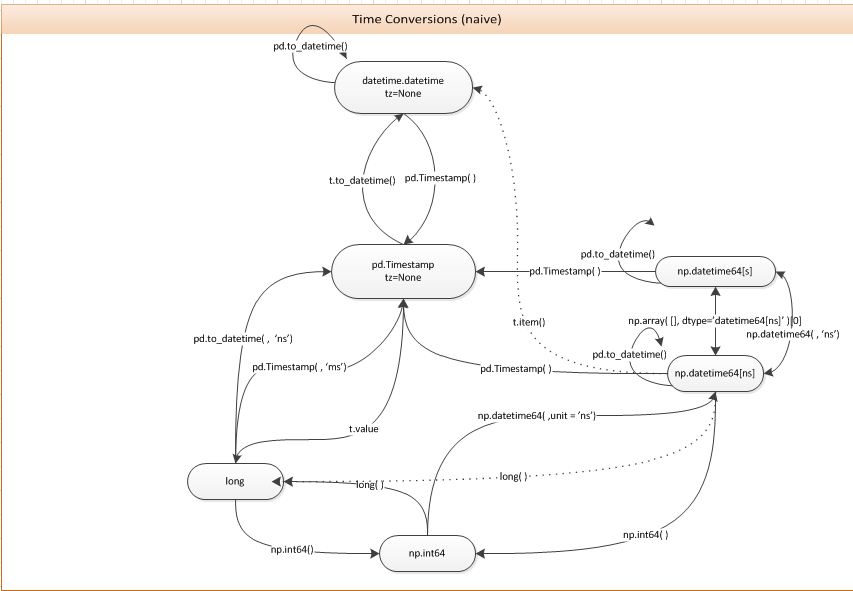

*Source: [StackOverflow](https://stackoverflow.com/questions/13703720/converting-between-datetime-timestamp-and-datetime64)*